In [1]:
# 最简单的是鸢尾花的例子，可以参考
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html

In [3]:
# 加载数据
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

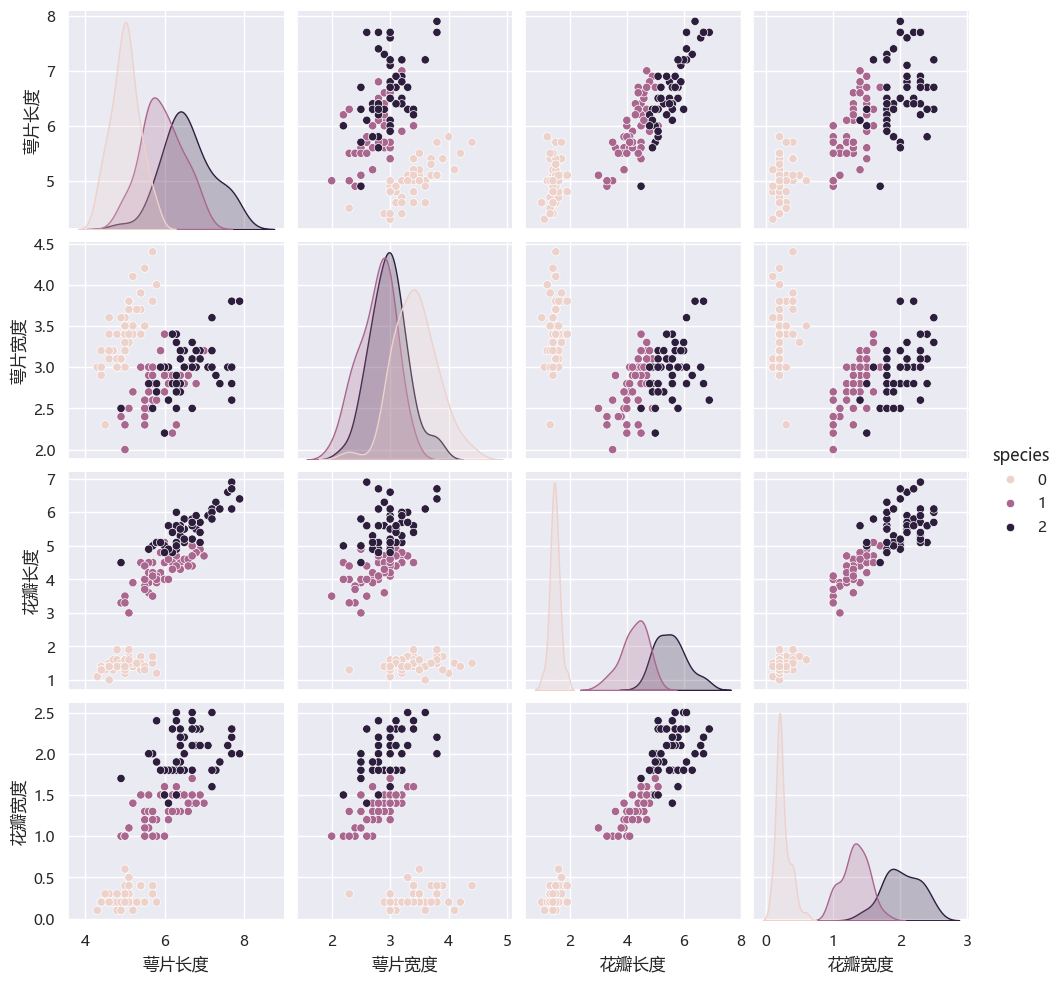

In [13]:
# 用 pandas 读取数据
import pandas as pd
feature_names = ['萼片长度', '萼片宽度', '花瓣长度', '花瓣宽度']
df = pd.DataFrame(X, columns=feature_names)
df['species'] = iris.target

# 用散点图矩阵展示
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_theme(font='Microsoft YaHei') 

sns.pairplot(data=df, hue="species", height=2.5)
plt.show()

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm

# 使用支持向量机做训练， 先取两个特征，便于图形化展示
select_columns = [1, 3]
X = iris.data[:, select_columns]
y = iris.target
labels = df.columns[select_columns]

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# 模型训练
def train_model(X, y, C, xx, yy):
    svm_classifier = svm.SVC(kernel="rbf", C=C)
    svm_classifier.fit(X, y)
    Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    accuracy_score = svm_classifier.score(X_test, y_test)
    return Z, accuracy_score

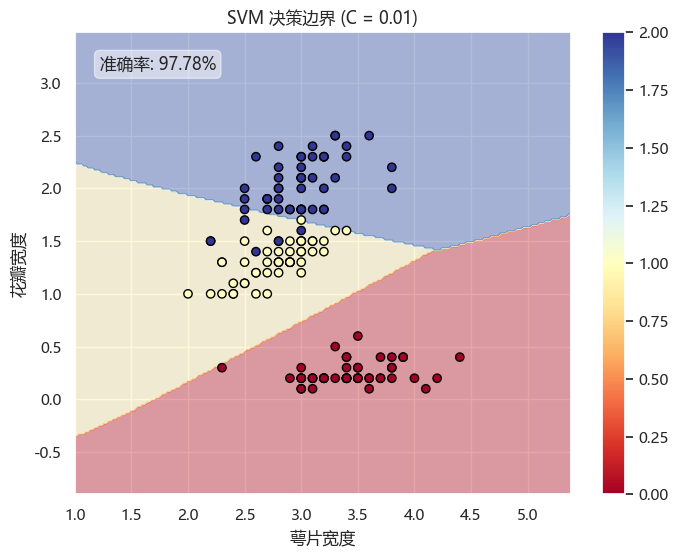

In [25]:
# 显示
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

plt.rcParams["font.sans-serif"] = ["Microsoft YaHei"]

# 创建网格，设置边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# 创建网格点, 用于 contourf 绘制决策边界
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# 初始化图形
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors="black")
contourf = ax.contourf(xx, yy, np.zeros(xx.shape), alpha=0.4, cmap=plt.cm.RdYlBu)


# 添加颜色条
plt.colorbar(scatter)

C_values = np.logspace(-2, 2, 50)


# 动画更新函数
def update(frame):
    C = C_values[frame]
    Z, accuracy_score = train_model(X, y, C, xx, yy)
    ax.clear()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors="black")
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_title(f"SVM 决策边界 (C = {C:.2f})")
    ax.text(
        0.05,
        0.95,
        f"准确率: {accuracy_score*100:.2f}%",
        transform=ax.transAxes,
        verticalalignment="top",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.5),
    )

    return ax


anim = FuncAnimation(fig, update, frames=len(C_values), interval=100, repeat=False)
html = anim.to_html5_video()
HTML(html)